In [1]:
import sys
print("Python:", sys.version)

import numpy as np
print("NumPy:", np.__version__)

import pandas as pd
print("Pandas:", pd.__version__)

import sklearn
print("Scikit-learn:", sklearn.__version__)

import spacy
print("SpaCy:", spacy.__version__)

Python: 3.8.5 (default, Sep  4 2020, 07:30:14) 
[GCC 7.3.0]
NumPy: 1.16.4
Pandas: 0.25.3
Scikit-learn: 0.23.2
SpaCy: 2.3.4


## Read the SMS Spam Collections dataset

In [2]:
df = pd.read_csv('SMSSpamCollection.txt', sep='\t',names= ['y', 'x'])
df.head()

,y,x
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df.describe()

,y,x
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


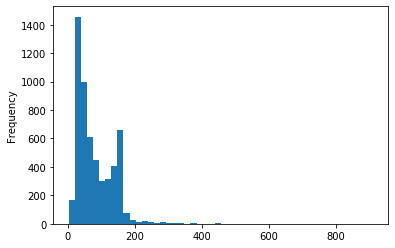

In [4]:
df['x'].apply(len).plot(bins=50, kind='hist') 

## Tokenize and POS-tag the input texts with spaCy

In [5]:
#!python3 -m spacy download en
nlp = spacy.load("en")

In [6]:
# Tokenization
# Old: df['tokens'] = df['x'].apply(nlp)
tokens = []
for text in nlp.pipe(iter(df['x']), n_threads=-1):
    tokens.append(text)
df['tokens'] = tokens

In [7]:
df

,y,x,tokens
0,ham,"Go until jurong point, crazy.. Available only ...","(Go, until, jurong, point, ,, crazy, .., Avail..."
1,ham,Ok lar... Joking wif u oni...,"(Ok, lar, ..., Joking, wif, u, oni, ...)"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"(Free, entry, in, 2, a, wkly, comp, to, win, F..."
3,ham,U dun say so early hor... U c already then say...,"(U, dun, say, so, early, hor, ..., U, c, alrea..."
4,ham,"Nah I don't think he goes to usf, he lives aro...","(Nah, I, do, n't, think, he, goes, to, usf, ,,..."
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,"(This, is, the, 2nd, time, we, have, tried, 2,..."
5568,ham,Will ü b going to esplanade fr home?,"(Will, ü, b, going, to, esplanade, fr, home, ?)"
5569,ham,"Pity, * was in mood for that. So...any other s...","(Pity, ,, *, was, in, mood, for, that, ., So, ..."
5570,ham,The guy did some bitching but I acted like i'd...,"(The, guy, did, some, bitching, but, I, acted,..."


In [8]:
df.head()

,y,x,tokens
0,ham,"Go until jurong point, crazy.. Available only ...","(Go, until, jurong, point, ,, crazy, .., Avail..."
1,ham,Ok lar... Joking wif u oni...,"(Ok, lar, ..., Joking, wif, u, oni, ...)"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"(Free, entry, in, 2, a, wkly, comp, to, win, F..."
3,ham,U dun say so early hor... U c already then say...,"(U, dun, say, so, early, hor, ..., U, c, alrea..."
4,ham,"Nah I don't think he goes to usf, he lives aro...","(Nah, I, do, n't, think, he, goes, to, usf, ,,..."


In [9]:
# POS-tag
df['pos'] = df['tokens'].apply(lambda x: [i.pos_ for i in x])

In [10]:
df.head()

,y,x,tokens,pos
0,ham,"Go until jurong point, crazy.. Available only ...","(Go, until, jurong, point, ,, crazy, .., Avail...","[VERB, ADP, ADJ, NOUN, PUNCT, ADJ, PUNCT, ADJ,..."
1,ham,Ok lar... Joking wif u oni...,"(Ok, lar, ..., Joking, wif, u, oni, ...)","[INTJ, NOUN, PUNCT, NOUN, CCONJ, PROPN, PROPN,..."
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"(Free, entry, in, 2, a, wkly, comp, to, win, F...","[ADJ, NOUN, ADP, NUM, DET, NOUN, NOUN, PART, V..."
3,ham,U dun say so early hor... U c already then say...,"(U, dun, say, so, early, hor, ..., U, c, alrea...","[PROPN, PROPN, VERB, ADV, ADJ, NOUN, PUNCT, PR..."
4,ham,"Nah I don't think he goes to usf, he lives aro...","(Nah, I, do, n't, think, he, goes, to, usf, ,,...","[INTJ, PRON, AUX, PART, VERB, PRON, VERB, ADP,..."


## Do POS-tag based and list-based stop-word filtering using ​ spaCy​ .

### stop word filtering

In [11]:
def filter_stop_worlds(tokens):
    filtered_tokens = []
    for t in tokens:
        if not t.is_stop:
            filtered_tokens.append(t)
    return filtered_tokens

In [12]:
stop_filtered = df['tokens'].apply(lambda x: filter_stop_worlds(x))
stop_filtered

0       [jurong, point, ,, crazy, .., Available, bugis...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3                    [U, dun, early, hor, ..., U, c, ...]
4                       [Nah, think, goes, usf, ,, lives]
                              ...                        
5567    [2nd, time, tried, 2, contact, u., U, won, £, ...
5568                [ü, b, going, esplanade, fr, home, ?]
5569           [Pity, ,, *, mood, ., ..., suggestions, ?]
5570    [guy, bitching, acted, like, interested, buyin...
5571                                      [Rofl, ., true]
Name: tokens, Length: 5572, dtype: object

## Build and train 3 classical ML-based classifiers on TF-IDF BOW

### With text

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
# use lambda x: x to disable the built in tokenizer of TfidfVectorizer
vectorizer = TfidfVectorizer(
    analyzer='word',
    tokenizer=lambda x: x,
    preprocessor=lambda x: x,
    token_pattern=None) 

X = vectorizer.fit_transform(stop_filtered)
y = df['y']

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [15]:
print(X_train.shape)
print(y_train.shape)

(4457, 62957)
(4457,)


In [16]:
# SVM
from sklearn import svm
svc = svm.LinearSVC()
svc.fit(X_train, y_train)
svc.score(X_test, y_test)

0.8663677130044843

In [17]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train.toarray(), y_train)
gnb.score(X_test.toarray(), y_test)

0.1336322869955157

In [18]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=10)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8663677130044843

### With lemma

In [35]:
def filter_stopwords_and_get_lemma(tokens):
    filtered_tokens = []
    for t in tokens:
        if not t.is_stop:
            filtered_tokens.append(t.lemma)
    return filtered_tokens

In [47]:
stop_filtered_lemma = df['tokens'].apply(lambda x: filter_stopwords_and_get_lemma(x))
stop_filtered_lemma[0]

[14096818269429646414,
 15479733260938818482,
 2593208677638477497,
 16792598155547231470,
 8848021949395737739,
 4887332976578131782,
 3557720637082594454,
 13210364986222294696,
 8881679497796027013,
 1703489418272052182,
 6804705863737483857,
 1720370409040345145,
 9503240487077079950,
 10875615029400813363,
 3040539950272399101,
 2013399242189103424,
 15198862986666964157,
 8445541832527975875,
 10875615029400813363]

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer
# use lambda x: x to disable the built in tokenizer of TfidfVectorizer
vectorizer = TfidfVectorizer(
    analyzer='word',
    tokenizer=lambda x: x,
    preprocessor=lambda x: x,
    token_pattern=None) 

X = vectorizer.fit_transform(stop_filtered_lemma)
y = df['y']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [51]:
# SVM
from sklearn import svm
svc = svm.LinearSVC()
svc.fit(X_train, y_train)
svc.score(X_test, y_test)

0.9838565022421525

In [52]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train.toarray(), y_train)
gnb.score(X_test.toarray(), y_test)

0.8887892376681614

In [53]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=10)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9713004484304932

In [34]:
print(
"""
                                   Results
                     With text                With lemma
SVM               0.8663677130044843      0.9838565022421525
Naive Bayes       0.1336322869955157      0.8887892376681614
Random Forest     0.8663677130044843      0.9713004484304932
""")


                                   Results
                     With text                With lemma
SVM               0.8663677130044843      0.8663677130044843
Naive Bayes       0.1336322869955157      0.7614349775784753
Random Forest     0.8663677130044843      0.9076233183856502

